In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from rtbm import RTBM, minimizer
from rtbm.costfunctions import logarithmic

## Generate data

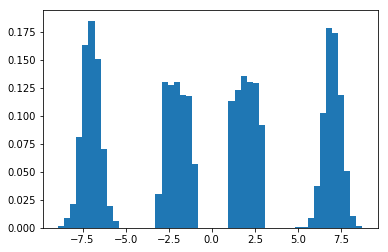

In [2]:
# likas 1d example
n = 5000

data = np.zeros(n)
u = np.random.random_sample(n)
for i in range(n):
    if u[i] < 0.25:
        data[i] = np.random.normal(-7, 0.5)
    elif u[i] < 0.50:
        data[i] = np.random.uniform(-3,-1)
    elif u[i] < 0.75:
        data[i] = np.random.uniform(1,3)
    else:
        data[i] = np.random.normal(7, 0.5)
data = data.reshape(1,n)
plt.hist(data.T, normed=True, bins=50);

## Training

In [3]:
a = RTBM(1,2, init_max_param_bound=20)

In [ ]:
minim = minimizer.CMA(False)
solution = minim.train(logarithmic(), a, data, tolfun=1e-5)

CMA on 1 cpu(s) enabled
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 9 (seed=348613, Fri Nov 10 11:44:31 2017)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     10 8.238082839189190e+04 1.0e+00 1.95e+00  2e+00  2e+00 0:00.2
    2     20 2.846152318180709e+04 1.2e+00 1.89e+00  2e+00  2e+00 0:01.6
    3     30 8.986151054944264e+04 1.3e+00 1.85e+00  2e+00  2e+00 0:03.0
    5     50 3.843360466484808e+04 1.4e+00 1.75e+00  2e+00  2e+00 0:06.1
    8     80 1.899205771708383e+04 1.7e+00 1.48e+00  1e+00  2e+00 0:10.6
   12    120 1.951557768449195e+04 2.0e+00 1.08e+00  8e-01  1e+00 0:16.0
   16    160 2.087365451007384e+04 2.3e+00 9.79e-01  7e-01  1e+00 0:23.2
   21    210 3.130906024959082e+04 2.7e+00 9.29e-01  6e-01  1e+00 0:32.1
   26    260 2.202118120633845e+04 3.2e+00 8.07e-01  4e-01  8e-01 0:40.5
   32    320 2.711970754367107e+04 3.4e+00 8.60e-01  4e-01  1e+00 0:50.2
   39    390 1.656315259988134e+04 5.0e+00 5.47e-01  2e-01  6e-01 1:01.5
   45    4

## Testing output

In [ ]:
test_data = (np.linspace(-10,10, 100)).reshape(1, 100)
plt.hist(data.T, bins=50, normed=True);
plt.plot(test_data.flatten(), a(test_data).flatten(), 'o-')